x_train_np min: -4.9530454 max: 4.8837385
y_train_np min: 0.009357574 max: 2.9633558


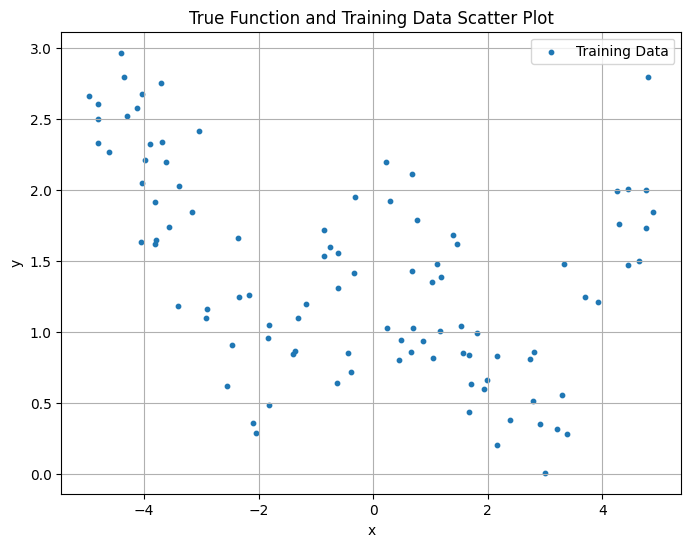

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

# 设置随机种子以保证结果可复现
torch.manual_seed(0)
np.random.seed(0)
p_star = 5
# 定义真实函数的参数
a = np.array([3, -7, 11, -7, -4, 7], dtype=np.float32)
p_star = len(a) - 1
sigma = 0.4  # 可以调整噪声的标准差

# 定义真实函数 f_star
def f_star(x):
    result = np.zeros_like(x, dtype=np.float32)
    for k in range(p_star + 1):
        result += a[k] / (1 + 2 * k * np.exp(-(x - k + 4)))
    return result

# 生成训练数据
n = 100
x_train = np.random.uniform(-5, 5, n)
y_train = f_star(x_train) + sigma * np.random.normal(0, 1, n)

# 转换为 PyTorch 张量
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# 创建数据集和数据加载器
dataset = TensorDataset(x_train_tensor, y_train_tensor)
data_loader = DataLoader(dataset, batch_size=n, shuffle=False)

# 从 DataLoader 中提取数据
for x_batch, y_batch in data_loader:
    x_batch_np = x_batch.numpy().flatten()
    y_batch_np = y_batch.numpy()
    break  # 只需要第一个批次的数据

# 确认数据的范围和分布
print("x_train_np min:", x_batch_np.min(), "max:", x_batch_np.max())
print("y_train_np min:", y_batch_np.min(), "max:", y_batch_np.max())

# 绘制真实函数 f_star 和训练数据
x_plot = np.linspace(-5, 5, 500)
y_plot = f_star(x_plot)

plt.figure(figsize=(8, 6))
plt.scatter(x_batch_np, y_batch_np, s=10, label='Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True Function and Training Data Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()




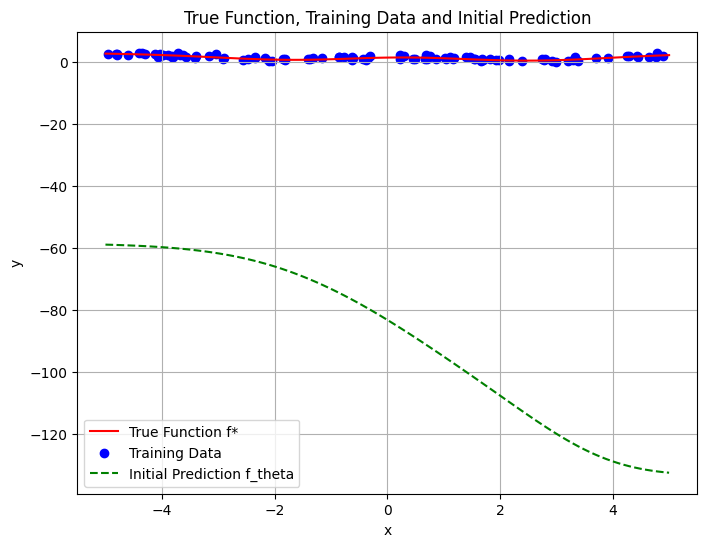

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# 设置随机种子
torch.manual_seed(0)
np.random.seed(0)

# 定义真の函数 f_star 的参数
a = np.array([3, -7, 11, -7, -4, 7], dtype=np.float32)
p_star = len(a) - 1
sigma = 0.4

# 定义真の函数 f_star
def f_star(x):
    result = np.zeros_like(x, dtype=np.float32)
    for k in range(p_star + 1):
        result += a[k] / (1 + 2 * k * np.exp(-(x - k + 4)))
    return result

# 生成训练数据
n = 100
x_train = np.random.uniform(-5, 5, n)
y_train = f_star(x_train) + sigma * np.random.normal(0, 1, n)

# 定义随机初始参数 θ
theta = np.random.uniform(-100, 100, size=(p_star + 1)).astype(np.float32)

# 定义预测函数 f_theta
def f_theta(x, theta):
    result = np.zeros_like(x, dtype=np.float32)
    for k in range(len(theta)):
        result += theta[k] / (1 + 2 * k * np.exp(-(x - k + 3)))
    return result

# 计算初始 θ 时的预测结果
y_pred = f_theta(x_train, theta)

# 绘制真实函数 f_star 和训练数据
x_plot = np.linspace(-5, 5, 100)
y_plot = f_star(x_plot)

plt.figure(figsize=(8, 6))
plt.plot(x_plot, y_plot, color='red', label='True Function f*')
plt.scatter(x_train, y_train, color='blue', label='Training Data')

# 重ねて绘制预测函数 f_theta
y_pred_plot = f_theta(x_plot, theta)
plt.plot(x_plot, y_pred_plot, color='green', linestyle='--', label='Initial Prediction f_theta')

plt.xlabel('x')
plt.ylabel('y')
plt.title('True Function, Training Data and Initial Prediction')

plt.legend()
plt.grid(True)
plt.show()


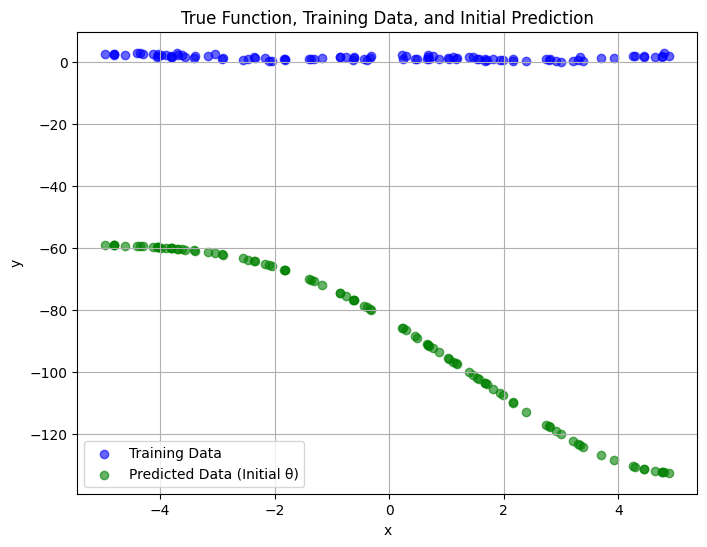

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# 设置随机种子
torch.manual_seed(0)
np.random.seed(0)

p_star = 5
# 定义真の函数 f_star 的参数
a = np.array([3, -7, 11, -7, -4, 7], dtype=np.float32)
p_star = len(a) - 1
sigma = 0.4

# 定义真の函数 f_star
def f_star(x):
    result = np.zeros_like(x, dtype=np.float32)
    for k in range(p_star + 1):
        result += a[k] / (1 + 2 * k * np.exp(-(x - k + 4)))
    return result

# 生成训练数据
n = 100
x_train = np.random.uniform(-5, 5, n)
y_train = f_star(x_train) + sigma * np.random.normal(0, 1, n)

# 定义随机初始参数 θ
theta = np.random.uniform(-100, 100, size=(p_star + 1)).astype(np.float32)

# 定义预测函数 f_theta
def f_theta(x, theta):
    result = np.zeros_like(x, dtype=np.float32)
    for k in range(len(theta)):
        result += theta[k] / (1 + 2 * k * np.exp(-(x - k + 3)))
    return result

# 计算初始 θ 时的预测结果
y_pred = f_theta(x_train, theta)

# 绘制图形
plt.figure(figsize=(8, 6))


# 绘制训练数据
plt.scatter(x_train, y_train, color='blue', label='Training Data', alpha=0.6)

# 绘制预测数据
plt.scatter(x_train, y_pred, color='green', label='Predicted Data (Initial θ)', alpha=0.6)

# 配置图形
plt.xlabel('x')
plt.ylabel('y')
plt.title('True Function, Training Data, and Initial Prediction')

plt.legend()
plt.grid(True)

# 显示图形
plt.show()


In [ ]:
!pip install torchviz


  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=5f58f79f466fb7a4ae748b5d343e17de629a1d17698ee923d524e4808d79b22f
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


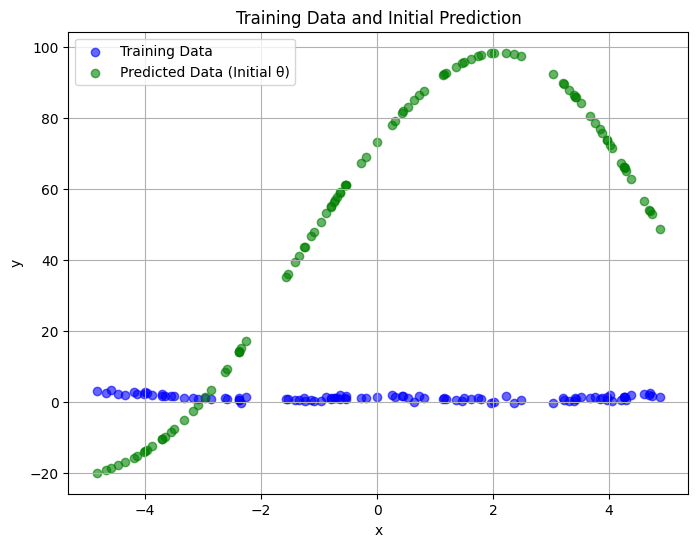

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torchviz import make_dot

# 设定参数
p_star = 5

# 定义预测模型类
class Predictor(nn.Module):
    def __init__(self, p_star):
        super(Predictor, self).__init__()
        self.p_star = p_star
        np.random.seed(42)  # 设置随机种子
        theta_list = np.random.uniform(-100, 100, size=(p_star + 1))  # 随机生成 theta
        self.theta = nn.Parameter(torch.tensor(theta_list, dtype=torch.float32))

    def forward(self, x):
        result = torch.zeros_like(x)
        for i in range(self.p_star + 1):
            result += self.theta[i] / (1 + i ** 2 * torch.exp(-(x - i + 3)))
        return result

# 实例化模型
model = Predictor(p_star)

# 生成训练数据
n = 100
x_train = torch.FloatTensor(n).uniform_(-5, 5)  # 从均匀分布 U(-5, 5) 生成 n 个样本
sigma = 0.4
a = torch.tensor([3, -7, 11, -7, -4, 7], dtype=torch.float32)
def f_star(x):
    result = torch.zeros_like(x)
    for k in range(p_star + 1):
        result += a[k] / (1 + 2 * k * torch.exp(-(x - k + 4)))
    return result

epsilon = torch.randn(n)
y_train = f_star(x_train) + sigma * epsilon

# 计算模型的预测值
y_pred_model = model(x_train)

# 定义损失函数
def loss_fn(y_pred, y_true):
    return 0.5 * torch.mean((y_pred - y_true) ** 2)

# 计算损失
loss = loss_fn(y_pred_model, y_train)

# 绘制计算图
dot = make_dot(loss, params=dict(model.named_parameters()))
dot.format = 'png'
dot.render("kadai3")
dot

# 可视化训练数据和预测数据
plt.figure(figsize=(8, 6))
plt.scatter(x_train.numpy(), y_train.numpy(), color='blue', label='Training Data', alpha=0.6)
plt.scatter(x_train.numpy(), y_pred_model.detach().numpy(), color='green', label='Predicted Data (Initial θ)', alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Data and Initial Prediction')
plt.legend()
plt.grid(True)
plt.show()



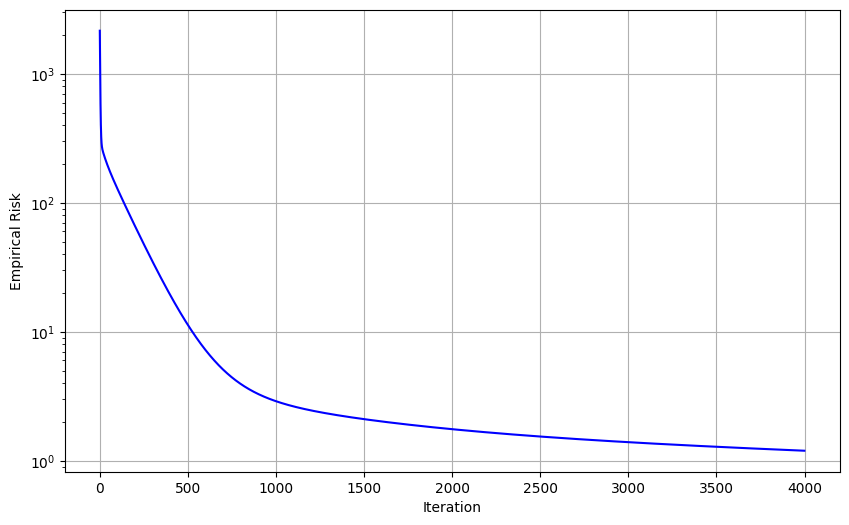

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# 定义预测模型类
class Predictor(nn.Module):
    def __init__(self, p_star):
        super(Predictor, self).__init__()
        self.p_star = p_star
        np.random.seed(42)  # 设置随机种子
        theta_list = np.random.uniform(-100, 100, size=(p_star + 1))  # 随机生成 theta
        self.theta = nn.Parameter(torch.tensor(theta_list, dtype=torch.float32))

    def forward(self, x):
        result = torch.zeros_like(x)
        for i in range(self.p_star + 1):
            result += self.theta[i] / (1 + i ** 2 * torch.exp(-(x - i + 3)))
        return result

# 设定参数
p_star = 5
learning_rate = 0.1  # 学习率
num_epochs = 4000  # 训练的总迭代次数

# 实例化模型
model = Predictor(p_star)

# 生成训练数据
n = 100
x_train = torch.FloatTensor(n).uniform_(-5, 5)  # 从均匀分布 U(-5, 5) 生成 n 个样本
sigma = 0.4
a = torch.tensor([3, -7, 11, -7, -4, 7], dtype=torch.float32)

def f_star(x):
    result = torch.zeros_like(x)
    for k in range(p_star + 1):
        result += a[k] / (1 + 2 * k * torch.exp(-(x - k + 4)))
    return result

epsilon = torch.randn(n)
y_train = f_star(x_train) + sigma * epsilon

# 设置优化器
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 记录经验风险的列表
loss_history = []

# 训练模型
for epoch in range(num_epochs):
    # 勾配の初期化
    optimizer.zero_grad()

    # 预测
    y_pred = model(x_train)

    # 计算损失
    loss = 0.5 * (y_pred - y_train) ** 2
    loss = loss.mean()  # 转换为标量

    # 反向传播
    loss.backward()

    # 更新参数
    optimizer.step()

    # 记录损失值
    loss_history.append(loss.item())

# 绘制学习曲线
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), loss_history, color='blue')
plt.xlabel('Iteration')
plt.ylabel('Empirical Risk')
plt.yscale('log')  # 使用对数刻度
plt.grid(True)
plt.show()


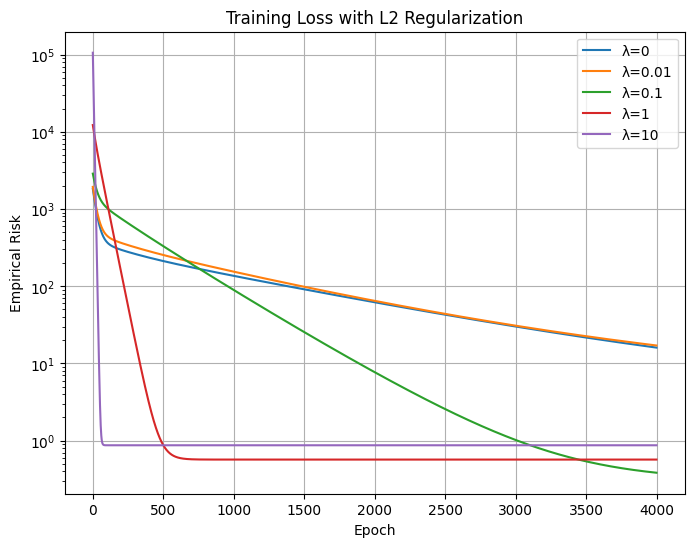

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 定义预测模型类
class Predictor(nn.Module):
    def __init__(self, p_star):
        super(Predictor, self).__init__()
        self.p_star = p_star
        np.random.seed(42)
        theta_list = np.random.uniform(-100, 100, size=(p_star + 1))
        self.theta = nn.Parameter(torch.tensor(theta_list, dtype=torch.float32))

    def forward(self, x):
        result = torch.zeros_like(x)
        for i in range(self.p_star + 1):
            result += self.theta[i] / (1 + i ** 2 * torch.exp(-(x - i + 3)))
        return result

# 生成数据
def generate_data(n, p_star, sigma=0.4):
    x = torch.FloatTensor(n).uniform_(-5, 5)
    epsilon = torch.randn(n)
    a = torch.tensor([3, -7, 11, -7, -4, 7], dtype=torch.float32)
    def f_star(x):
        result = torch.zeros_like(x)
        for k in range(p_star + 1):
            result += a[k] / (1 + 2 * k * torch.exp(-(x - k + 4)))
        return result
    y = f_star(x) + sigma * epsilon
    return x, y

# 设定参数
p_star = 5
n = 100
x_train, y_train = generate_data(n, p_star)

# 训练和绘制函数
def train_and_plot(lambda_values, num_epochs=4000, learning_rate=0.01):
    plt.figure(figsize=(8, 6))

    for lambda_val in lambda_values:
        model = Predictor(p_star)
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)

        loss_history = []

        for epoch in range(num_epochs):
            optimizer.zero_grad()
            y_pred = model(x_train)
            raw_loss = 0.5 * (y_pred - y_train) ** 2
            raw_loss = raw_loss.mean()
            l2_reg = 0.5 * lambda_val * torch.sum(model.theta ** 2)
            total_loss = raw_loss + l2_reg
            total_loss.backward()
            optimizer.step()

            loss_history.append(total_loss.item())

        plt.plot(range(num_epochs), loss_history, label=f'λ={lambda_val}')

    plt.xlabel('Epoch')
    plt.ylabel('Empirical Risk')
    plt.title('Training Loss with L2 Regularization')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()

# λ 的值
lambda_values = [0, 0.01, 0.1, 1, 10]
train_and_plot(lambda_values)


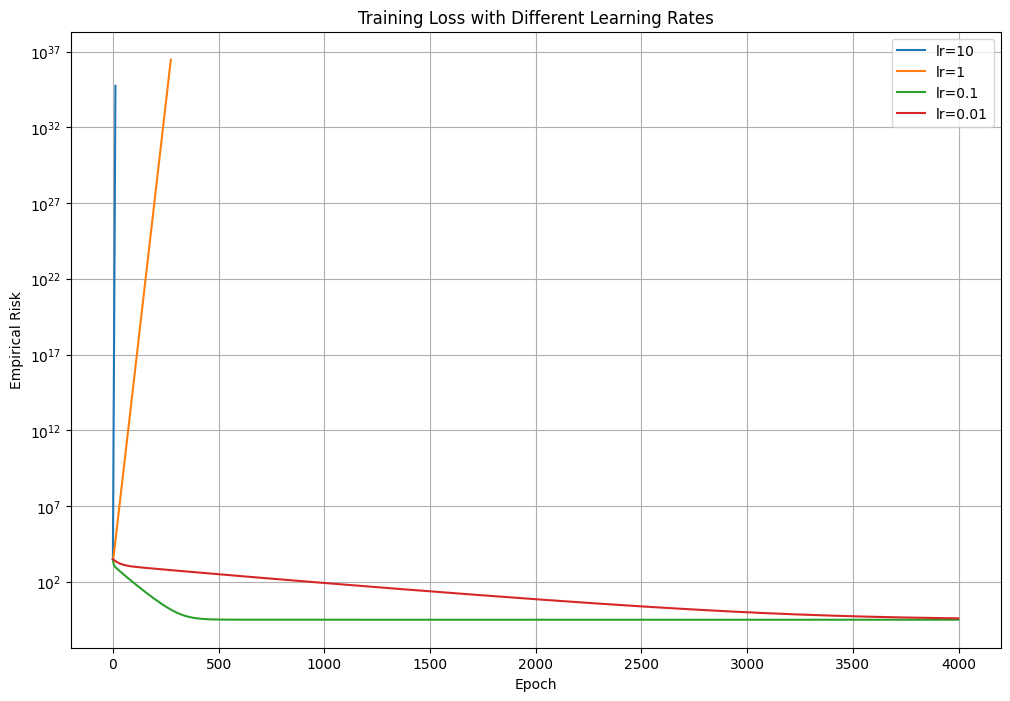

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 定义预测模型类
class Predictor(nn.Module):
    def __init__(self, p_star):
        super(Predictor, self).__init__()
        self.p_star = p_star
        np.random.seed(42)
        theta_list = np.random.uniform(-100, 100, size=(p_star + 1))
        self.theta = nn.Parameter(torch.tensor(theta_list, dtype=torch.float32))

    def forward(self, x):
        result = torch.zeros_like(x)
        for i in range(self.p_star + 1):
            result += self.theta[i] / (1 + i ** 2 * torch.exp(-(x - i + 3)))
        return result

# 生成数据
def generate_data(n, p_star, sigma=0.4):
    x = torch.FloatTensor(n).uniform_(-5, 5)
    epsilon = torch.randn(n)
    a = torch.tensor([3, -7, 11, -7, -4, 7], dtype=torch.float32)
    def f_star(x):
        result = torch.zeros_like(x)
        for k in range(p_star + 1):
            result += a[k] / (1 + 2 * k * torch.exp(-(x - k + 4)))
        return result
    y = f_star(x) + sigma * epsilon
    return x, y

# 训练和绘制函数
def train_and_plot(lr_values, lambda_val=0.1, num_epochs=4000):
    plt.figure(figsize=(12, 8))

    for lr in lr_values:
        model = Predictor(p_star)
        optimizer = optim.SGD(model.parameters(), lr=lr)

        loss_history = []

        for epoch in range(num_epochs):
            optimizer.zero_grad()
            y_pred = model(x_train)
            raw_loss = 0.5 * (y_pred - y_train) ** 2
            raw_loss = raw_loss.mean()
            l2_reg = 0.5 * lambda_val * torch.sum(model.theta ** 2)
            total_loss = raw_loss + l2_reg
            total_loss.backward()
            optimizer.step()

            loss_history.append(total_loss.item())

        label = f'lr={lr}'
        plt.plot(range(num_epochs), loss_history, label=label)

    plt.xlabel('Epoch')
    plt.ylabel('Empirical Risk')
    plt.title('Training Loss with Different Learning Rates')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()

# 参数设置
p_star = 5
n = 100
x_train, y_train = generate_data(n, p_star)

# 不同学习率值
lr_values = [10, 1, 0.1, 0.01]

train_and_plot(lr_values)



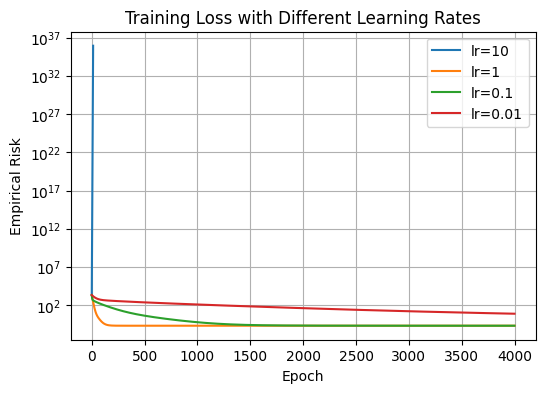

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 定义预测模型类
class Predictor(nn.Module):
    def __init__(self, p_star):
        super(Predictor, self).__init__()
        self.p_star = p_star
        np.random.seed(42)
        theta_list = np.random.uniform(-100, 100, size=(p_star + 1))
        self.theta = nn.Parameter(torch.tensor(theta_list, dtype=torch.float32))

    def forward(self, x):
        result = torch.zeros_like(x)
        for i in range(self.p_star + 1):
            result += self.theta[i] / (1 + i ** 2 * torch.exp(-(x - i + 3)))
        return result

# 生成数据
def generate_data(n, p_star, sigma=0.4):
    x = torch.FloatTensor(n).uniform_(-5, 5)
    epsilon = torch.randn(n)
    a = torch.tensor([3, -7, 11, -7, -4, 7], dtype=torch.float32)
    def f_star(x):
        result = torch.zeros_like(x)
        for k in range(p_star + 1):
            result += a[k] / (1 + 2 * k * torch.exp(-(x - k + 4)))
        return result
    y = f_star(x) + sigma * epsilon
    return x, y

# 训练和绘制函数
def train_and_plot(lr_values, lambda_val=0.1, num_epochs=4000):
    plt.figure(figsize=(6, 4))

    for lr in lr_values:
        model = Predictor(p_star)
        optimizer = optim.SGD(model.parameters(), lr=lr,weight_decay=lambda_value)

        loss_history = []

        for epoch in range(num_epochs):
            optimizer.zero_grad()
            y_pred = model(x_train)
            raw_loss = 0.5 * (y_pred - y_train) ** 2
            raw_loss = raw_loss.mean()
            l2_reg = 0.5 * lambda_val * torch.sum(model.theta ** 2)
            total_loss = raw_loss + l2_reg
            total_loss.backward()
            optimizer.step()

            loss_history.append(total_loss.item())

        label = f'lr={lr}'
        plt.plot(range(num_epochs), loss_history, label=label)
    plt.xlabel('Epoch')
    plt.ylabel('Empirical Risk')
    plt.title('Training Loss with Different Learning Rates')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()

p_star = 5
n = 100
x_train, y_train = generate_data(n, p_star)

lambda_value = 0.01
# 不同学习率值
lr_values = [10, 1, 0.1, 0.01]



# 训练并绘制学习曲线
train_and_plot(lr_values, lambda_value)


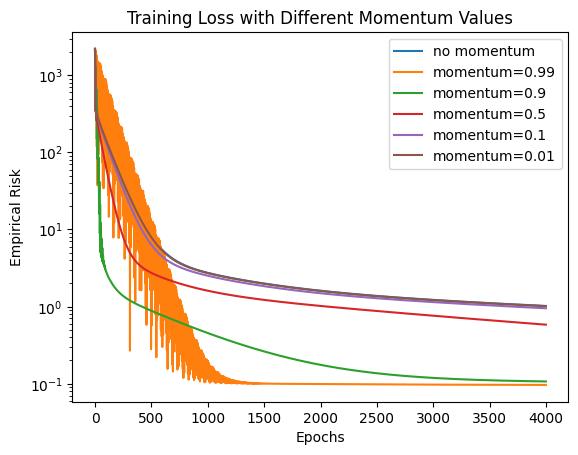

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 定义预测模型类
class Predictor(nn.Module):
    def __init__(self, p_star):
        super(Predictor, self).__init__()
        self.p_star = p_star
        np.random.seed(42)
        theta_list = np.random.uniform(-100, 100, size=(p_star + 1))
        self.theta = nn.Parameter(torch.tensor(theta_list, dtype=torch.float32))

    def forward(self, x):
        result = torch.zeros_like(x)
        for i in range(self.p_star + 1):
            result += self.theta[i] / (1 + i ** 2 * torch.exp(-(x - i + 3)))
        return result


# 生成数据
def generate_data(n, p_star, sigma=0.4):
    x = torch.FloatTensor(n).uniform_(-5, 5)
    epsilon = torch.randn(n)
    a = torch.tensor([3, -7, 11, -7, -4, 7], dtype=torch.float32)
    def f_star(x):
        result = torch.zeros_like(x)
        for k in range(p_star + 1):
            result += a[k] / (1 + 2 * k * torch.exp(-(x - k + 4)))
        return result
    y = f_star(x) + sigma * epsilon
    return x, y
# 训练和绘制函数
def train_with_momentum(momentum_values, lr, x_train, y_train, num_epochs=4000):
    for momentum in momentum_values:
        model = Predictor(p_star=5)
        if momentum is not None:
            optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
            label = f'momentum={momentum}'
        else:
            optimizer = optim.SGD(model.parameters(), lr=lr)
            label = 'no momentum'


        loss_history = []

        for epoch in range(num_epochs):
            optimizer.zero_grad()
            y_pred = model(x_train)
            loss = 0.5 * (y_pred - y_train) ** 2
            loss = loss.mean()
            loss.backward()
            optimizer.step()
            loss_history.append(loss.item())


        plt.plot(range(num_epochs), loss_history, label=label)

    plt.xlabel('Epochs')
    plt.ylabel('Empirical Risk')
    plt.yscale('log')
    plt.legend()
    plt.title('Training Loss with Different Momentum Values')
    plt.show()

p_star = 5
n = 100
x_train, y_train = generate_data(n, p_star)

momentum_values = [None,0.99, 0.9, 0.5, 0.1, 0.01]
lr = 0.1  # 固定学习率

# 训练并绘制学习曲线
train_with_momentum(momentum_values, lr, x_train, y_train)

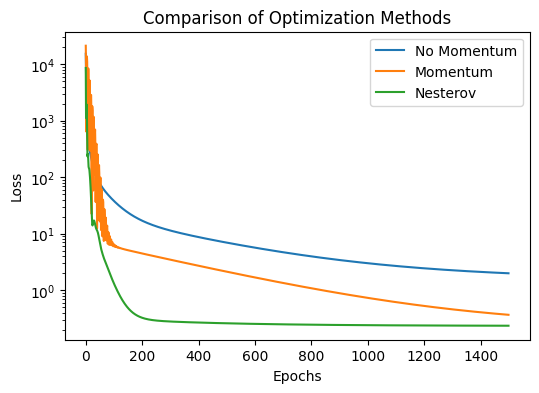

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以确保结果可复现


class Predictor(nn.Module):
    def __init__(self, p_star):
        super(Predictor, self).__init__()
        theta_list = np.random.uniform(-100, 100, size=(p_star + 1))
        self.theta = nn.Parameter(torch.tensor(theta_list, dtype=torch.float32))

    def forward(self, x):
        result = torch.zeros_like(x)
        for i in range(self.theta.shape[0]):
            result += self.theta[i] / (1 + i**2 * torch.exp(-(x-i+3)))
        return result

# 生成模拟数据
def generate_data(n=100):
    x_train_np = np.random.uniform(-5, 5, n)
    a = np.array([3, -7, 11, -7, -4, 7])
    f_star = lambda x: sum(a[k] / (1 + k * np.exp(-(x-k+4))) for k in range(len(a)))
    y_train_np = f_star(x_train_np) + 0.4 * np.random.normal(0, 1, n)
    return torch.tensor(x_train_np, dtype=torch.float32).unsqueeze(1), torch.tensor(y_train_np, dtype=torch.float32).unsqueeze(1)

# 训练函数
def train(model, optimizer, criterion, X, y, epochs=1500):
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

# 生成数据
X, y = generate_data(n=100)

# 创建三个相同的模型实例
model_no_momentum = Predictor(p_star=5)
model_momentum = Predictor(p_star=5)
model_nesterov = Predictor(p_star=5)

# 定义损失函数
criterion = nn.MSELoss()

# 创建优化器
lr = 0.1
momentum = 0.9
optimizer_no_momentum = optim.SGD(model_no_momentum.parameters(), lr=lr)
optimizer_momentum = optim.SGD(model_momentum.parameters(), lr=lr, momentum=momentum)
optimizer_nesterov = optim.SGD(model_nesterov.parameters(), lr=lr, momentum=momentum, nesterov=True)

# 训练模型
losses_no_momentum = train(model_no_momentum, optimizer_no_momentum, criterion, X, y)
losses_momentum = train(model_momentum, optimizer_momentum, criterion, X, y)
losses_nesterov = train(model_nesterov, optimizer_nesterov, criterion, X, y)

# 绘制学习曲线
plt.figure(figsize=(6, 4))
plt.plot(losses_no_momentum, label='No Momentum')
plt.plot(losses_momentum, label='Momentum')
plt.plot(losses_nesterov, label='Nesterov')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Optimization Methods')
plt.legend()
plt.yscale('log')  # 使用对数刻度以更好地显示损失变化
plt.show()

# 绘制预测结果
# X_plot = torch.linspace(-5, 5, 200).unsqueeze(1)
# y_no_momentum = model_no_momentum(X_plot).detach().numpy()
# y_momentum = model_momentum(X_plot).detach().numpy()
# y_nesterov = model_nesterov(X_plot).detach().numpy()

# plt.figure(figsize=(12, 6))
# plt.scatter(X, y, color='black', alpha=0.5, label='Data')
# plt.plot(X_plot, y_no_momentum, color='blue', label='No Momentum')
# plt.plot(X_plot, y_momentum, color='green', label='Momentum')
# plt.plot(X_plot, y_nesterov, color='red', label='Nesterov')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Prediction Comparison')
# plt.legend()
# plt.show()



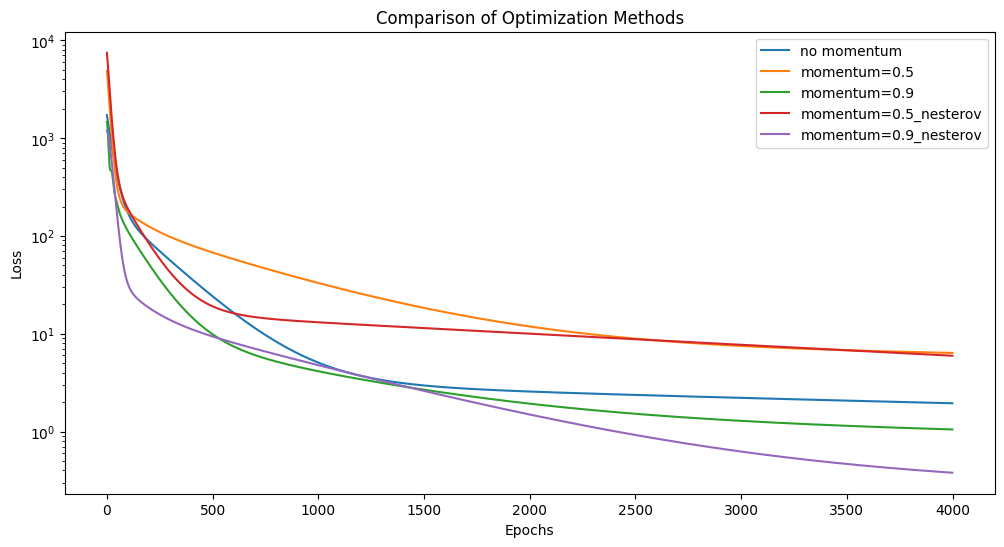

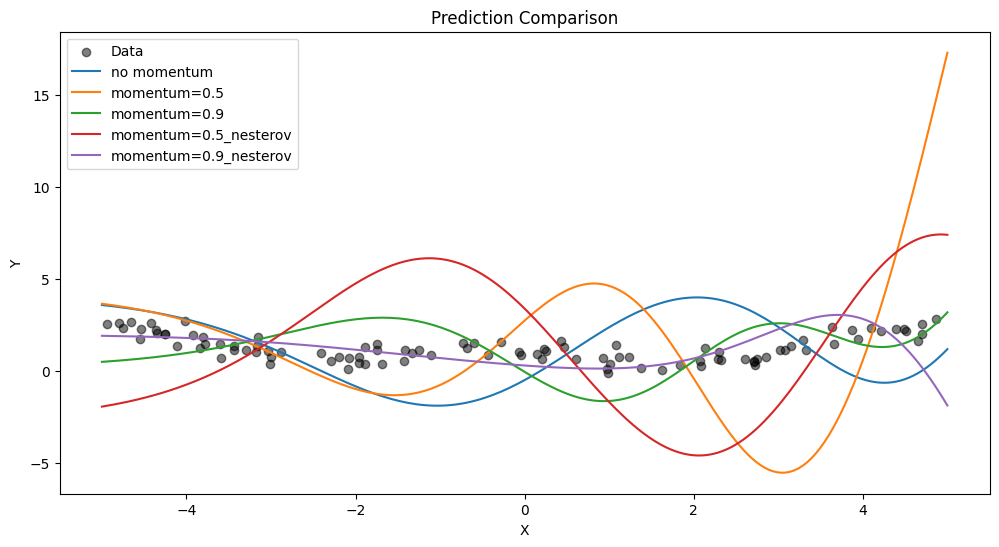

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以确保结果可复现
torch.manual_seed(42)
np.random.seed(42)

class Predictor(nn.Module):
    def __init__(self, p_star):
        super(Predictor, self).__init__()
        theta_list = np.random.uniform(-100, 100, size=(p_star + 1))
        self.theta = nn.Parameter(torch.tensor(theta_list, dtype=torch.float32))

    def forward(self, x):
        result = torch.zeros_like(x)
        for i in range(self.theta.shape[0]):
            result += self.theta[i] / (1 + i**2 * torch.exp(-(x-i+3)))
        return result

# 生成模拟数据
def generate_data(n=100):
    x_train_np = np.random.uniform(-5, 5, n)
    a = np.array([3, -7, 11, -7, -4, 7])
    f_star = lambda x: sum(a[k] / (1 + k * np.exp(-(x-k+4))) for k in range(len(a)))
    y_train_np = f_star(x_train_np) + 0.4 * np.random.normal(0, 1, n)
    return torch.tensor(x_train_np, dtype=torch.float32).unsqueeze(1), torch.tensor(y_train_np, dtype=torch.float32).unsqueeze(1)

def train_with_momentum(momentum_values, lr, x_train, y_train, num_epochs=4000, use_nesterov=False):
    results = {}
    for momentum in momentum_values:
        model = Predictor(p_star=5)
        if momentum is not None:
            optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=use_nesterov)
            label = f'momentum={momentum}{"_nesterov" if use_nesterov else ""}'
        else:
            optimizer = optim.SGD(model.parameters(), lr=lr)
            label = 'no momentum'

        loss_history = []

        for epoch in range(num_epochs):
            optimizer.zero_grad()
            y_pred = model(x_train)
            loss = 0.5 * (y_pred - y_train) ** 2
            loss = loss.mean()
            loss.backward()
            optimizer.step()
            loss_history.append(loss.item())

        results[label] = {'model': model, 'loss_history': loss_history}

    return results

# 生成数据
X, y = generate_data(n=100)

# 设置参数
lr = 0.01
momentum_values = [None, 0.5, 0.9]
num_epochs = 4000

# 训练模型
results_no_nesterov = train_with_momentum(momentum_values, lr, X, y, num_epochs, use_nesterov=False)
results_nesterov = train_with_momentum(momentum_values[1:], lr, X, y, num_epochs, use_nesterov=True)

# 合并结果
results = {**results_no_nesterov, **results_nesterov}

# 绘制学习曲线
plt.figure(figsize=(12, 6))
for label, data in results.items():
    plt.plot(data['loss_history'], label=label)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Optimization Methods')
plt.legend()
plt.yscale('log')  # 使用对数刻度以更好地显示损失变化
plt.show()

# 绘制预测结果
X_plot = torch.linspace(-5, 5, 200).unsqueeze(1)
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='black', alpha=0.5, label='Data')
for label, data in results.items():
    y_pred = data['model'](X_plot).detach().numpy()
    plt.plot(X_plot, y_pred, label=label)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Prediction Comparison')
plt.legend()
plt.show()